In [87]:
from sklearn import svm
import pandas as pd
input_file = "datatrain.csv"
test= "datatest.csv"

# comma delimited is the default
df = pd.read_csv(input_file,sep=';', header = 0)
datatest= pd.read_csv(input_file,sep=';', header = 0)
# for space delimited use:
# df = pd.read_csv(input_file, header = 0, delimiter = " ")

# for tab delimited use:
# df = pd.read_csv(input_file, header = 0, delimiter = "\t")

# put the original column names in a python list
original_headers = list(df.columns.values)

# remove the non-numeric columns
df1 = df._get_numeric_data()


# put the numeric column names in a python list
numeric_headers = list(df1.columns.values)

# create a numpy array with the numeric values for input into scikit-learn
numpy_array = df1.values
numpy_array

array([[2004,  157,   30, ...,    3,   71,    1],
       [2000,  135,   79, ...,    7,   39,    2],
       [2007,  173,   96, ...,    4,   76,    3],
       ...,
       [1959,  168,   80, ...,    7,   74, 1393],
       [1959,  174,   26, ...,    4,   65, 1394],
       [1959,  133,   50, ...,    3,   56, 1395]], dtype=int64)

In [6]:
Y=df.loc[:,['Genre']]
# Previously train_y was a Series, now it's numpy array (it is a column-vector).
# If I apply train_y.ravel(), then it becomes a row vector and no error message appears
Y = Y.values.ravel()
Y 

array(['ALTERNATIVOS', 'ROCK', 'METAL', ..., 'ROCK', 'JAZZ FUNK',
       'ALTERNATIVOS'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numpy_array, Y, test_size=0.3)

In [ ]:
model = RandomForestClassifier(n_estimators=10000)
model.fit(X_train,y_train)
model.score(X_test, y_test)

In [ ]:
model = LogisticRegression(C=5, solver='liblinear',multi_class='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

In [10]:
# XGBOOST
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [13]:
X, y = df.iloc[:,2:13],df.iloc[:,14]
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_test

,Year,Beats,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
61,2004,79,60,56,-7,38,44,210,18,3,58
1241,1998,110,89,60,-9,17,53,323,10,5,44
1339,1967,132,58,50,-9,32,65,175,41,3,69
598,1971,104,51,38,-15,54,40,355,1,5,55
898,1984,79,27,34,-16,26,14,210,61,3,44
...,...,...,...,...,...,...,...,...,...,...,...
328,2011,88,40,37,-13,8,27,189,4,3,27
1155,1995,94,77,53,-6,26,45,212,1,3,24
134,2000,159,64,52,-5,17,32,272,39,2,52
1049,1990,81,42,15,-12,21,17,273,43,3,69


In [79]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.8,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [91]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
preds

[21:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


array([ 139.00084 , 1173.9576  , 1267.5643  ,  586.98016 ,  925.472   ,
         94.36923 ,  735.8756  ,  827.765   ,  402.51968 ,  -36.29017 ,
        861.9528  ,  446.3998  ,  285.2844  , 1013.4107  ,  149.04884 ,
        752.91534 ,  257.11325 , 1315.2239  ,  423.674   ,  967.25037 ,
       1179.7942  , 1053.2106  ,  551.7792  ,  892.70355 ,  842.49664 ,
        304.54135 , 1078.157   , 1202.0809  ,  306.2697  ,  674.11163 ,
       1151.7052  ,  820.3652  ,  358.63083 ,  552.20013 ,  699.4864  ,
        194.09634 ,  151.38428 ,  143.96419 ,  472.67987 ,  847.8731  ,
       1118.9429  ,   98.40988 ,  874.2532  ,   70.60355 ,  405.97766 ,
        822.00977 ,  442.8779  ,  646.0194  , 1230.9805  , 1242.8129  ,
       1373.9833  ,  386.13782 , 1012.1003  ,  329.87103 , 1220.3809  ,
        233.02177 ,  603.1043  , 1103.1396  ,  193.73973 , 1333.6196  ,
        381.59116 ,  160.42049 ,   74.48572 ,  367.99323 , 1262.5604  ,
       1209.3912  , 1059.3877  , 1048.0862  ,   58.026352, 1312.

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 91.352054


In [83]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[21:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,743.109721,4.596431,745.356506,10.733424
1,682.738200,6.545162,687.291443,19.337416
2,621.105367,3.846546,626.095805,9.862808
3,577.232300,3.146635,584.975260,10.458066
4,538.857015,2.787168,548.279704,10.188455


In [84]:
print((cv_results["test-rmse-mean"]).tail(1))

49    118.260831
Name: test-rmse-mean, dtype: float64


NameError: name 'plt' is not defined

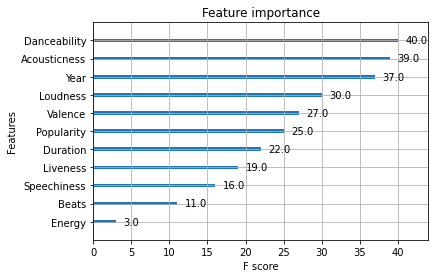

In [85]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
Xnew = [[...], [...]]
ynew = model.predict(Xnew)

In [ ]:
model = svm.SVC(kernel= 'linear', C=1, gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(numpy_array, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    


In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df